#### MARKETPULSE STOCK MARKET TREND ANALYSIS

In [ ]:
# INSTALLING BASIC LIBRARIES
%pip install pandas
%pip install numpy 
%pip install scipy 
%pip install matplotlib seaborn scikit-learn ta
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [ ]:
# IMPORTING BASIC LIBRARIES
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import ta                                        # for technical analysis indicators


In [ ]:
# Creating the project folder structure
import os

folders = ["data", "notebooks", "models", "outputs"]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Project folder structure created successfully!")


Project folder structure created successfully!


In [ ]:
# loading the data set

stock_prices = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Amdari\First Project\stock_prices.csv")
stock_P_indicators = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Amdari\First Project\stock_prices_with_indicators.csv")
comp_Info = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Amdari\First Project\company_info.csv")
market_indices = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Amdari\First Project\market_indices.csv")  




In [ ]:
# Verifying data loading

datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

# Loop through each dataset and display info
for name, df in datasets.items():
    print(f"===== {name} =====")
    print("Shape:", df.shape, "\n")
    
    print("Info:")
    df.info()
    print("\nHead:")
    display(df.head()) 
    print("\n" + "="*60 + "\n")




===== stock_prices =====
Shape: (15600, 8) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          15600 non-null  object 
 1   date            15600 non-null  object 
 2   open            15600 non-null  float64
 3   high            15600 non-null  float64
 4   low             15600 non-null  float64
 5   close           15600 non-null  float64
 6   volume          15600 non-null  int64  
 7   adjusted_close  15600 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 975.1+ KB

Head:


,ticker,date,open,high,low,close,volume,adjusted_close
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644,160.11
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685,162.36
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177,161.78
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833,167.07
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261,165.68




===== stock_P_indicators =====
Shape: (15502, 31) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticker            15502 non-null  object 
 1   date              15502 non-null  object 
 2   open              15502 non-null  float64
 3   high              15502 non-null  float64
 4   low               15502 non-null  float64
 5   close             15502 non-null  float64
 6   volume            15502 non-null  float64
 7   adjusted_close    15502 non-null  float64
 8   sma_20            15192 non-null  float64
 9   sma_50            15502 non-null  float64
 10  sma_200           15502 non-null  float64
 11  ema_12            15502 non-null  float64
 12  ema_26            15502 non-null  float64
 13  macd              15191 non-null  float64
 14  macd_signal       15502 non-null  float64
 15  macd_histogram    15502 non

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110000,160.110000,...,2.88,2.880,962644.00,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235000,161.235000,...,5.39,4.135,1137664.50,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177.0,161.78,161.416667,161.416667,...,1.57,3.280,1241502.00,1.167277,NaN,NaN,0.002251,0.012463,-0.012301,Sideways
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833.0,167.07,162.830000,162.830000,...,6.12,3.990,1314834.75,1.167320,NaN,NaN,0.026039,0.018138,-0.061950,Downtrend
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261.0,165.68,163.400000,163.400000,...,4.08,4.008,1221520.00,0.694431,NaN,NaN,0.013953,0.018663,-0.070196,Downtrend




===== comp_Info =====
Shape: (20, 4) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticker        20 non-null     object
 1   company_name  20 non-null     object
 2   sector        20 non-null     object
 3   ipo_date      20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes

Head:


,ticker,company_name,sector,ipo_date
0,STK001,TechCorp,Technology,2021-04-10
1,STK002,DataSystems,Technology,2016-10-12
2,STK003,CloudNine,Technology,2016-01-18
3,STK004,CyberShield,Technology,2022-02-21
4,STK005,MediPharm,Healthcare,2018-03-05




===== market_indices =====
Shape: (780, 7) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           780 non-null    object 
 1   sp500_close    780 non-null    float64
 2   nasdaq_close   780 non-null    float64
 3   vix_close      780 non-null    float64
 4   treasury_10y   780 non-null    float64
 5   dollar_index   780 non-null    float64
 6   market_regime  780 non-null    object 
dtypes: float64(5), object(2)
memory usage: 42.8+ KB

Head:


,date,sp500_close,nasdaq_close,vix_close,treasury_10y,dollar_index,market_regime
0,2021-01-04,3891.04,12952.02,20.48,1.496,90.07,bull
1,2021-01-05,3847.20,13116.52,19.89,1.504,90.73,bull
2,2021-01-06,3878.24,12818.48,20.02,1.507,90.46,bull
3,2021-01-07,3803.95,13290.11,19.59,1.498,90.67,bull
4,2021-01-08,3715.64,13365.73,20.14,1.498,90.64,bull


#### *INSIGHT:
##### The following data sets: Stock prices, stock prices with indicators, company info, market Indices have a mismatch in the data types of the ticker,date, ipo_date.
##### - Ticker appear as object rather than strings 
##### - Date also appears as object rather than a date datatype
##### - ipo_date is also an object rather than a date datatype

In [ ]:
# Verifying missing values in the data sets
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

for name, df in datasets.items():
    print(f"===== {name} =====")
    print("\nMissing Values:")
    display((df.isnull().sum() / len(df) * 100).map(lambda x: f"{x:.2f}%"))


print("\n" + "="*60 + "\n")

===== stock_prices =====

Missing Values:


ticker            0.00%
date              0.00%
open              0.00%
high              0.00%
low               0.00%
close             0.00%
volume            0.00%
adjusted_close    0.00%
dtype: object

===== stock_P_indicators =====

Missing Values:


ticker              0.00%
date                0.00%
open                0.00%
high                0.00%
low                 0.00%
close               0.00%
volume              0.00%
adjusted_close      0.00%
sma_20              2.00%
sma_50              0.00%
sma_200             0.00%
ema_12              0.00%
ema_26              0.00%
macd                2.01%
macd_signal         0.00%
macd_histogram      0.00%
rsi_14              2.13%
bb_middle           0.00%
bb_upper            0.13%
bb_lower            0.13%
bb_width            2.14%
true_range          0.00%
atr_14              0.00%
volume_sma_20       0.00%
volume_ratio        2.00%
momentum_10         1.29%
momentum_20         2.58%
price_to_sma_50     0.00%
volatility_20       0.26%
future_return_5d    0.00%
trend_label         0.00%
dtype: object

===== comp_Info =====

Missing Values:


ticker          0.00%
company_name    0.00%
sector          0.00%
ipo_date        0.00%
dtype: object

===== market_indices =====

Missing Values:


date             0.00%
sp500_close      0.00%
nasdaq_close     0.00%
vix_close        0.00%
treasury_10y     0.00%
dollar_index     0.00%
market_regime    0.00%
dtype: object

##### *INSIGHT: This shows that all other data sets are free of missing values except for the stock prices indicators data set

In [ ]:
# Checking for duplicates
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

for name, df in datasets.items():
    print(f"===== {name} =====")
    print("\nDuplicate Records:")
    duplicates = df.duplicated().sum()  # counts duplicate rows
    print(f"Total duplicate rows: {duplicates}")
    
    print("\n" + "="*60 + "\n")

===== stock_prices =====

Duplicate Records:
Total duplicate rows: 0


===== stock_P_indicators =====

Duplicate Records:
Total duplicate rows: 0


===== comp_Info =====

Duplicate Records:
Total duplicate rows: 0


===== market_indices =====

Duplicate Records:
Total duplicate rows: 0




#### *INSIGHT: There are no duplicates in any of the data sets.

In [ ]:
# Verifying date ranges and continuity in time-series data

# datasets dictionary
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

# Date columns for each dataset
date_columns = {
    'stock_prices': 'date',
    'stock_P_indicators': 'date',
    'comp_Info': 'ipo_date',        # special column name
    'market_indices': 'date'
}

# Loop through each dataset
for name, df in datasets.items():
    print(f"===== {name} =====")
    
    # Get the correct date column for this dataset
    date_col = date_columns.get(name)
    if date_col not in df.columns:
        print(f"No '{date_col}' column found in this dataset. Skipping continuity check.\n")
        print("="*60 + "\n")
        continue
    
    # Ensure date column is datetime
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Start and end dates
    start_date = df[date_col].min()
    end_date = df[date_col].max()
    print(f"Start date: {start_date}")
    print(f"End date: {end_date}\n")
    
    # Check continuity
    df_sorted = df.sort_values(date_col)
    full_range = pd.date_range(start=start_date, end=end_date, freq='D')  # Change 'D' if not daily
    missing_dates = full_range.difference(df_sorted[date_col])
    
    print(f"Total missing dates: {len(missing_dates)}")
    if len(missing_dates) > 0:
        print("Missing dates:")
        print(missing_dates)
    else:
        print("No missing dates. Continuity is fine.")
    
    print("\n" + "="*60 + "\n")



===== stock_prices =====
Start date: 2021-01-04 00:00:00
End date: 2023-12-29 00:00:00

Total missing dates: 310
Missing dates:
DatetimeIndex(['2021-01-09', '2021-01-10', '2021-01-16', '2021-01-17',
               '2021-01-23', '2021-01-24', '2021-01-30', '2021-01-31',
               '2021-02-06', '2021-02-07',
               ...
               '2023-11-25', '2023-11-26', '2023-12-02', '2023-12-03',
               '2023-12-09', '2023-12-10', '2023-12-16', '2023-12-17',
               '2023-12-23', '2023-12-24'],
              dtype='datetime64[ns]', length=310, freq=None)


===== stock_P_indicators =====
Start date: 2021-01-04 00:00:00
End date: 2023-12-25 00:00:00

Total missing dates: 310
Missing dates:
DatetimeIndex(['2021-01-09', '2021-01-10', '2021-01-16', '2021-01-17',
               '2021-01-23', '2021-01-24', '2021-01-30', '2021-01-31',
               '2021-02-06', '2021-02-07',
               ...
               '2023-11-25', '2023-11-26', '2023-12-02', '2023-12-03',
          

============================================================================================
##### * Summary findings & Deliverables: Data quality report documenting:
--------------------------------------------------------------------------------------------
●	Missing value percentages per column = Done
●	Data type corrections needed = Ensuring Ticker and date columns to be corrected to reflect their true data types (i.e string and date type)
●	Duplicate records count = No duplicate records found
●	Date range coverage per stock = Missing dates discovered.

---------------------------------------------------------------------------------------------

 #### * Plan for handling issues documented
 --------------------------------------------------------------------------------------------
 ●	Data type corrections needed = Ticker and date columns would be corrected to ensure they reflect their true data types (i.e string and date type)
 
 ●  Missing dates discovered: - i.e either applying Forward fill (ffill) which carries last observation forward (common for financial data).
         or                   -  Backward fill (bfill) method which fills with next available value.

### Data cleaning

##### 1. Converting the date and ticker column to their respective data type: object(string) & datetime

In [ ]:
# datasets dictionary
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

# Date columns for each dataset
date_columns = {
    'stock_prices': 'date',
    'stock_P_indicators': 'date',
    'comp_Info': 'ipo_date',
    'market_indices': 'date'
}

# Looping through each dataset
for name, df in datasets.items():
    print(f"Processing dataset: {name}")
    
    # Convert 'ticker' column to string if it exists
    if 'ticker' in df.columns:
        df['ticker'] = df['ticker'].astype(str)
        print(" - Converted 'ticker' to string")
    
    # Convert date column to datetime
    date_col = date_columns.get(name)
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')  # 'coerce' converts invalid dates to NaT
        print(f" - Converted '{date_col}' to datetime")
    
    print("\n")


Processing dataset: stock_prices
 - Converted 'ticker' to string
 - Converted 'date' to datetime


Processing dataset: stock_P_indicators
 - Converted 'ticker' to string
 - Converted 'date' to datetime


Processing dataset: comp_Info
 - Converted 'ticker' to string
 - Converted 'ipo_date' to datetime


Processing dataset: market_indices
 - Converted 'date' to datetime




In [ ]:
# Confirming the convertion of these columns

# datasets dictionary
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

# Loop through each dataset and show the first 5 rows
for name, df in datasets.items():
    print(f"===== {name} =====")
    display(df.head())
    
    print("\nColumn Data Types:")
    display(df.dtypes)
    
    print("\n" + "="*60 + "\n")


===== stock_prices =====


,ticker,date,open,high,low,close,volume,adjusted_close
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644,160.11
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685,162.36
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177,161.78
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833,167.07
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261,165.68



Column Data Types:


ticker                    object
date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
adjusted_close           float64
dtype: object



===== stock_P_indicators =====


,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110000,160.110000,...,2.88,2.880,962644.00,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235000,161.235000,...,5.39,4.135,1137664.50,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177.0,161.78,161.416667,161.416667,...,1.57,3.280,1241502.00,1.167277,NaN,NaN,0.002251,0.012463,-0.012301,Sideways
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833.0,167.07,162.830000,162.830000,...,6.12,3.990,1314834.75,1.167320,NaN,NaN,0.026039,0.018138,-0.061950,Downtrend
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261.0,165.68,163.400000,163.400000,...,4.08,4.008,1221520.00,0.694431,NaN,NaN,0.013953,0.018663,-0.070196,Downtrend



Column Data Types:


ticker                      object
date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
adjusted_close             float64
sma_20                     float64
sma_50                     float64
sma_200                    float64
ema_12                     float64
ema_26                     float64
macd                       float64
macd_signal                float64
macd_histogram             float64
rsi_14                     float64
bb_middle                  float64
bb_upper                   float64
bb_lower                   float64
bb_width                   float64
true_range                 float64
atr_14                     float64
volume_sma_20              float64
volume_ratio               float64
momentum_10                float64
momentum_20                float64
price_to_sma_50            float64
volatility_20       



===== comp_Info =====


,ticker,company_name,sector,ipo_date
0,STK001,TechCorp,Technology,2021-04-10
1,STK002,DataSystems,Technology,2016-10-12
2,STK003,CloudNine,Technology,2016-01-18
3,STK004,CyberShield,Technology,2022-02-21
4,STK005,MediPharm,Healthcare,2018-03-05



Column Data Types:


ticker                  object
company_name            object
sector                  object
ipo_date        datetime64[ns]
dtype: object



===== market_indices =====


,date,sp500_close,nasdaq_close,vix_close,treasury_10y,dollar_index,market_regime
0,2021-01-04,3891.04,12952.02,20.48,1.496,90.07,bull
1,2021-01-05,3847.20,13116.52,19.89,1.504,90.73,bull
2,2021-01-06,3878.24,12818.48,20.02,1.507,90.46,bull
3,2021-01-07,3803.95,13290.11,19.59,1.498,90.67,bull
4,2021-01-08,3715.64,13365.73,20.14,1.498,90.64,bull



Column Data Types:


date             datetime64[ns]
sp500_close             float64
nasdaq_close            float64
vix_close               float64
treasury_10y            float64
dollar_index            float64
market_regime            object
dtype: object

##### Handling Missing values in our data sets

In [ ]:

datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

for name, df in datasets.items():
    # Detect time-series: any datetime column
    is_time_series = any(df[col].dtype == 'datetime64[ns]' for col in df.columns)

    if is_time_series:
        # Forward fill for time-series data
        df.fillna(method='ffill', inplace=True)
        
        # Backward fill for any remaining NaNs
        df.fillna(method='bfill', inplace=True)
        print(f"{name}: Time-series detected, applied ffill then bfill")
    else:
        # Non-time-series: backward fill or drop if minimal
        df.fillna(method='bfill', inplace=True)
        if df.isna().sum().sum() > 0:
            df.dropna(inplace=True)
            print(f"{name}: Non-time-series, bfill applied, remaining NaNs dropped")
        else:
            print(f"{name}: Non-time-series, bfill applied, no NaNs remain")



stock_prices: Time-series detected, applied ffill then bfill
stock_P_indicators: Time-series detected, applied ffill then bfill
comp_Info: Time-series detected, applied ffill then bfill
market_indices: Time-series detected, applied ffill then bfill


C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_14132\56525094.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_14132\56525094.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
# Confirming missing values 
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

for name, df in datasets.items():
    print(f"===== {name} =====")
    print("\nMissing Values:")
    display((df.isnull().sum() / len(df) * 100).map(lambda x: f"{x:.2f}%"))


print("\n" + "="*60 + "\n")

===== stock_prices =====

Missing Values:


ticker            0.00%
date              0.00%
open              0.00%
high              0.00%
low               0.00%
close             0.00%
volume            0.00%
adjusted_close    0.00%
dtype: object

===== stock_P_indicators =====

Missing Values:


ticker              0.00%
date                0.00%
open                0.00%
high                0.00%
low                 0.00%
close               0.00%
volume              0.00%
adjusted_close      0.00%
sma_20              0.00%
sma_50              0.00%
sma_200             0.00%
ema_12              0.00%
ema_26              0.00%
macd                0.00%
macd_signal         0.00%
macd_histogram      0.00%
rsi_14              0.00%
bb_middle           0.00%
bb_upper            0.00%
bb_lower            0.00%
bb_width            0.00%
true_range          0.00%
atr_14              0.00%
volume_sma_20       0.00%
volume_ratio        0.00%
momentum_10         0.00%
momentum_20         0.00%
price_to_sma_50     0.00%
volatility_20       0.00%
future_return_5d    0.00%
trend_label         0.00%
dtype: object

===== comp_Info =====

Missing Values:


ticker          0.00%
company_name    0.00%
sector          0.00%
ipo_date        0.00%
dtype: object

===== market_indices =====

Missing Values:


date             0.00%
sp500_close      0.00%
nasdaq_close     0.00%
vix_close        0.00%
treasury_10y     0.00%
dollar_index     0.00%
market_regime    0.00%
dtype: object

### Exploratory Data Analysis





##### 1. Price Trend Analysis:

In [ ]:
# Merging stock price data set with company information on the "ticker" column to include sector data
stock_prices = stock_prices.merge(comp_Info[['ticker', 'sector']], on='ticker', how='left')


In [ ]:
stock_prices.head(2)

,ticker,date,open,high,low,close,volume,adjusted_close,sector
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644,160.11,Technology
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685,162.36,Technology


In [ ]:
# Stock selection

sample_stocks = (
    stock_prices.groupby('sector')['ticker']
    .first()  # first stock in each sector
    .head(5)  # pick only 5 sectors                           # Picking one stock from each of 5 different sectors
    .values
)

print(sample_stocks)


['STK013' 'STK017' 'STK009' 'STK005' 'STK001']


In [ ]:
# selecting only the rows in stock_prices that belong to the 5 chosen tickers
trend_data = stock_prices[stock_prices['ticker'].isin(sample_stocks)]



In [ ]:
trend_data[['sector', 'ticker']].value_counts()

sector      ticker
Consumer    STK013    780
Energy      STK017    780
Finance     STK009    780
Healthcare  STK005    780
Technology  STK001    780
Name: count, dtype: int64

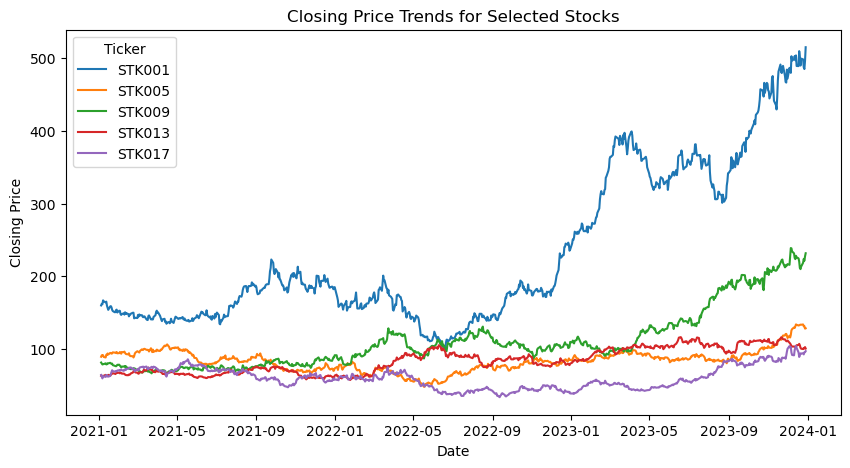

In [ ]:
# Plotting closing price trends

plt.figure(figsize=(10, 5))
sns.lineplot(data=trend_data, x='date', y='close', hue='ticker')
plt.title('Closing Price Trends for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Ticker')

plt.show()

##### *INSIGHT: 
###### -Stock with ticker STK001(Technology) shows the highest upward trend followed by the stock STK009(Finance).
######  - The ticker STK013(Consumer) exhibits a sideway trend. same as the Healthcare  stock(STK005)
###### - The Energy stock(STK017) however exhibits more of a downward trend over the years.

In [ ]:
# Calculating  the basic statistics: mean, median, std dev of returns

# Compute daily returns for each stock
trend_data['daily_return'] = trend_data.groupby('ticker')['close'].pct_change()

# calculate basic statistics for each stock
return_stats = trend_data.groupby(['sector', 'ticker'])['daily_return'].agg(['mean', 'median', 'std']).reset_index()

# Convert mean and std to percentages for readability
return_stats['mean'] = return_stats['mean'] * 100
return_stats['median'] = return_stats['median'] * 100
return_stats['std'] = return_stats['std'] * 100

# Round results
return_stats = return_stats.round(2)

display(return_stats)


C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_14132\3027138049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['daily_return'] = trend_data.groupby('ticker')['close'].pct_change()


,sector,ticker,mean,median,std
0,Consumer,STK013,0.08,0.11,1.89
1,Energy,STK017,0.10,0.18,2.96
2,Finance,STK009,0.16,0.16,2.34
3,Healthcare,STK005,0.07,-0.01,2.15
4,Technology,STK001,0.18,0.18,2.45


##### *INSIGHT:
--------------------------------------------------------------------------------------------------------------
###### mean : Shows the average daily return (%) i.e shows the typical daily gain/loss.

###### median:shows the middle daily return (%). 

###### Standard deviation of daily returns (%): i.e measures the volatility — how much the stock price fluctuates daily. Higher values mean more risk.

--------------------------------------------------------------------------------------------------------------
###### - Highest average daily return: Technology (STK001) and Finance (STK009).

###### - Most volatile stock: Energy (STK017) → highest std dev at 2.96%.

###### - Least volatile stock: Consumer (STK013) → lowest std dev at 1.89%.

###### -Healthcare (STK005) had slightly negative median daily returns → suggests more frequent small losses than gains.

------------------------------------------------------------------------------------------------------------------------

#### 2. Sector Comparison

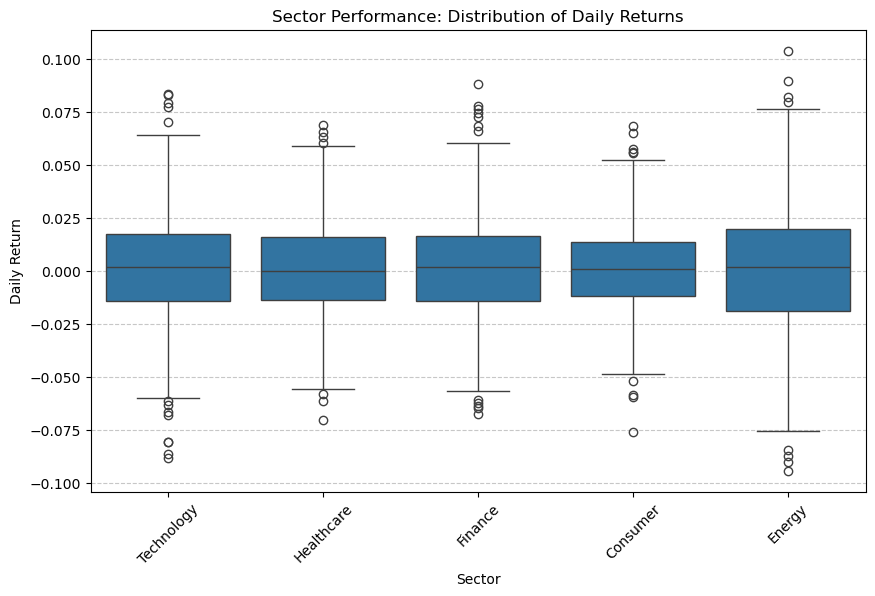

In [ ]:
# Visualizing sector performance with box plots

plt.figure(figsize=(10,6))

# Box plot of daily returns by sector
sns.boxplot(data=trend_data, x='sector', y='daily_return')

plt.title('Sector Performance: Distribution of Daily Returns')
plt.xlabel('Sector')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)  # rotate x labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### *INSIGHT:Outliers represent stocks whose returns are far from the typical range in that sector.
##### NB: The Outliers in each sector reveals that some stocks perform better giving higher returns, 
#####  while some perfom badly giving negative returns. The Technology sector for examples as seen above
#####  has most of its stocks giving returns of 2.5%, but some few stocks give returns of above 7.5%, and negative retunrs of -7.5%. 



#### 3.	Volume Analysis

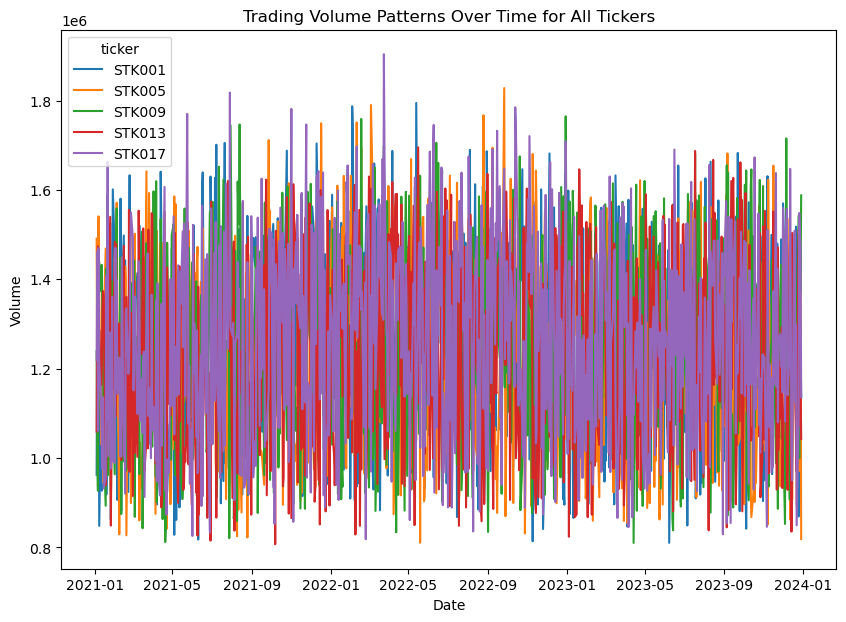

In [ ]:
# Plotting volume patterns over time

# Picking the first stock from each sector
sample_stocks_v = stock_prices.groupby('sector')['ticker'].first().values

# Filter data for plotting
volume_data = stock_prices[stock_prices['ticker'].isin(sample_stocks_v)]

plt.figure(figsize=(10, 7))
sns.lineplot(data=volume_data, x='date', y='volume', hue='ticker', legend=True)  
plt.title('Trading Volume Patterns Over Time for All Tickers')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

##### *INSIGHT: This reveals a large clustering around  1.0 to 1.4 million shares implying stocks typically trade around this volume.

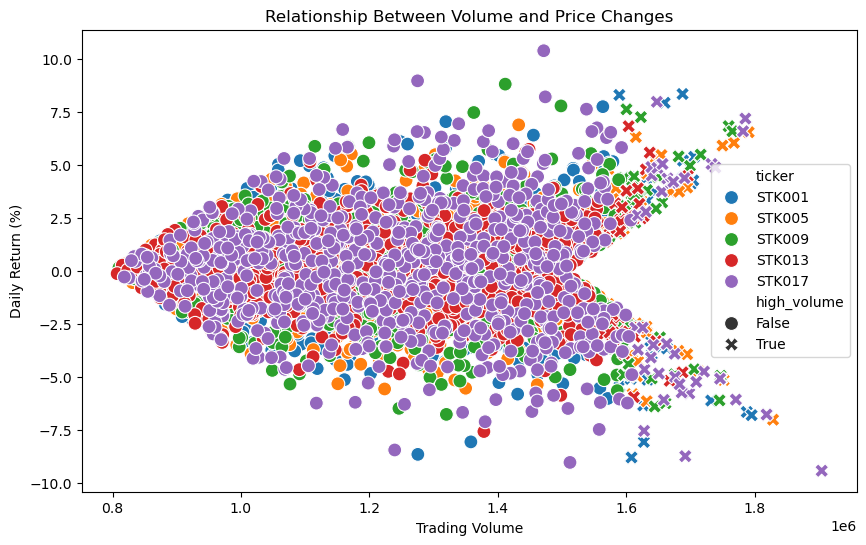

In [ ]:

# stock per sector
sample_stocks = stock_prices.groupby('sector')['ticker'].first().values
stock_data = stock_prices[stock_prices['ticker'].isin(sample_stocks)].copy()

# Calculate daily return (%)
stock_data['daily_return'] = stock_data.groupby('ticker')['close'].pct_change() * 100

# Identify high-volume days (top 5% per stock)
stock_data['high_volume'] = stock_data.groupby('ticker')['volume'].transform(
    lambda x: x > x.quantile(0.95)
)


plt.figure(figsize=(10,6))
sns.scatterplot(data=stock_data, x='volume', y='daily_return', hue='ticker', style='high_volume', s=100)
plt.title('Relationship Between Volume and Price Changes')
plt.xlabel('Trading Volume')
plt.ylabel('Daily Return (%)')
plt.show()


###### *INSIGHT: - Most points are clustered around low to moderate trading volumes and small daily returns, implying the “normal” trading days, and small price changes with the trading volume.

In [ ]:
# Calculating the correlation between volume and price movement

# Grouping by ticker and calculating the correlation between volume and daily_return
correlations = stock_data.groupby('ticker').apply(
    lambda x: x['volume'].corr(x['daily_return'])
).reset_index()

correlations.columns = ['ticker', 'volume_return_corr']
display(correlations)


C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_14132\979449713.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = stock_data.groupby('ticker').apply(


,ticker,volume_return_corr
0,STK001,-0.029889
1,STK005,-0.011901
2,STK009,0.039657
3,STK013,0.020711
4,STK017,-0.048034


##### This generally shows a very weak correlation between the volume and price change

#### 4. Technical Indicator Exploration:



In [ ]:
stock_P_indicators.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adjusted_close', 'sma_20', 'sma_50', 'sma_200', 'ema_12', 'ema_26',
       'macd', 'macd_signal', 'macd_histogram', 'rsi_14', 'bb_middle',
       'bb_upper', 'bb_lower', 'bb_width', 'true_range', 'atr_14',
       'volume_sma_20', 'volume_ratio', 'momentum_10', 'momentum_20',
       'price_to_sma_50', 'volatility_20', 'future_return_5d', 'trend_label'],
      dtype='object')

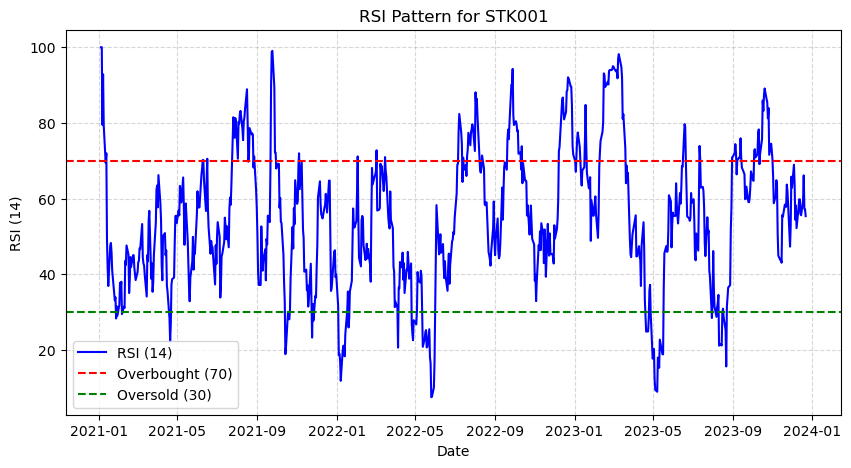

In [ ]:
# Visualizing RSI patterns and identifying overbought/oversold conditions

# Choosing a sample ticker to visualize 
chosenRSI_ticker = stock_P_indicators['ticker'].unique()[0]
ticker_df = stock_P_indicators[stock_P_indicators['ticker'] == chosenRSI_ticker]

# Plot RSI pattern
plt.figure(figsize=(10,5))
plt.plot(ticker_df['date'], ticker_df['rsi_14'], label='RSI (14)', color='blue')

# Adding overbought and oversold lines
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Titles and labels
plt.title(f'RSI Pattern for {chosenRSI_ticker}')
plt.xlabel('Date')
plt.ylabel('RSI (14)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



#### *INSIGHT: 
###### * The RSI (blue line) above 70 suggests the stock might be overbought — i.e
######    too many investors have been buying it, pushing the price up to a level that may be unsustainable in the near term.

###### *  The RSI below 30 suggests the stock might be oversold — i.e 
######     too many investors have been selling it, pushing the price below its fair value or creating an opportunity for a potential rebound.

In [ ]:

# Pick one ticker to visualize
chosenRSI_ticker = stock_P_indicators['ticker'].unique()[0]
ticker_df = stock_P_indicators[stock_P_indicators['ticker'] == chosenRSI_ticker]

# Calculating MACD and Signal
ticker_df['MACD'] = ticker_df['close'].ewm(span=12, adjust=False).mean() - ticker_df['close'].ewm(span=26, adjust=False).mean()
ticker_df['Signal'] = ticker_df['MACD'].ewm(span=9, adjust=False).mean()

# Identifying crossovers using the 'macd' and 'macd_signal' columns
ticker_df['Bullish'] = (ticker_df['MACD'] > ticker_df['Signal']) & (ticker_df['MACD'].shift(1) <= ticker_df['Signal'].shift(1))
ticker_df['Bearish'] = (ticker_df['MACD'] < ticker_df['Signal']) & (ticker_df['MACD'].shift(1) >= ticker_df['Signal'].shift(1))

C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_14132\486791370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df['MACD'] = ticker_df['close'].ewm(span=12, adjust=False).mean() - ticker_df['close'].ewm(span=26, adjust=False).mean()
C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_14132\486791370.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df['Signal'] = ticker_df['MACD'].ewm(span=9, adjust=False).mean()
C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_14132\486791370.py:

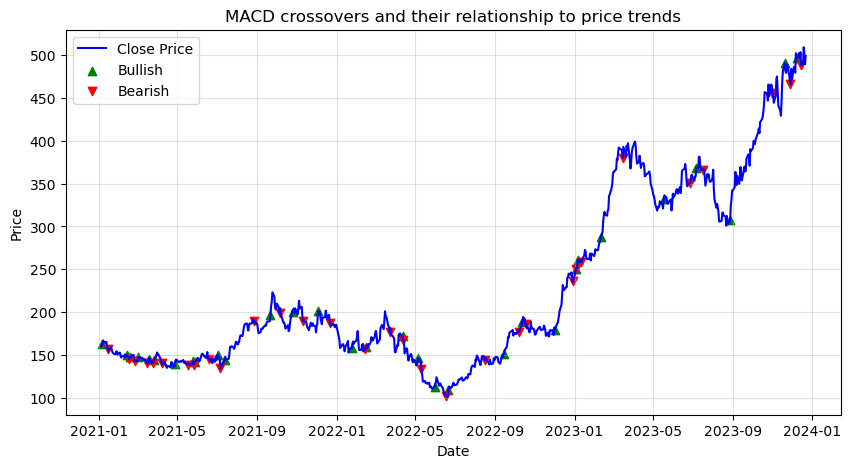

In [ ]:
# Plotting MACD crossovers and their relationship to price trends


# Plot
plt.figure(figsize=(10,5))
plt.plot(ticker_df['date'], ticker_df['close'], label='Close Price', color='blue')
plt.scatter(ticker_df[ticker_df['Bullish']]['date'], ticker_df[ticker_df['Bullish']]['close'], color='green', marker='^', label='Bullish')
plt.scatter(ticker_df[ticker_df['Bearish']]['date'], ticker_df[ticker_df['Bearish']]['close'], color='red', marker='v', label='Bearish')
plt.title('MACD crossovers and their relationship to price trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


#### 5.	Correlation Analysis:



In [ ]:
stock_P_indicators.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adjusted_close', 'sma_20', 'sma_50', 'sma_200', 'ema_12', 'ema_26',
       'macd', 'macd_signal', 'macd_histogram', 'rsi_14', 'bb_middle',
       'bb_upper', 'bb_lower', 'bb_width', 'true_range', 'atr_14',
       'volume_sma_20', 'volume_ratio', 'momentum_10', 'momentum_20',
       'price_to_sma_50', 'volatility_20', 'future_return_5d', 'trend_label'],
      dtype='object')

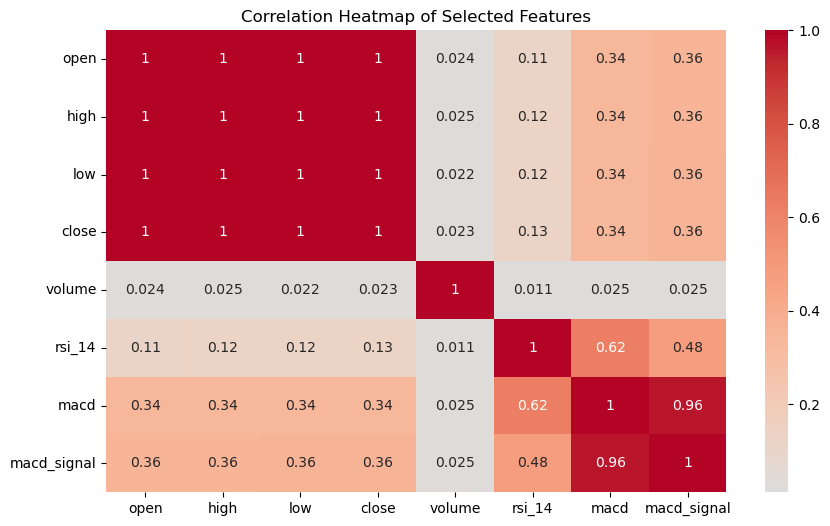

In [ ]:

# Selecting some numerical columns of interest
Selected_features = ['open', 'high', 'low', 'close','volume', 'rsi_14', 'macd', 'macd_signal']

# Computing the correlation matrix
corr = stock_P_indicators[Selected_features].corr()

# Ploting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


##### *INSIGHT: 
###### This reveals that every change in one column, for instance ('open', 'high', 'low', 'close),
######    is exactly proportional to changes in the others. For example, if open goes up by 1 unit, high, low, 
###### and close also go up by a fixed amount.

### Feature Selection & Data Preparation

In [ ]:
stock_P_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ticker            15502 non-null  object        
 1   date              15502 non-null  datetime64[ns]
 2   open              15502 non-null  float64       
 3   high              15502 non-null  float64       
 4   low               15502 non-null  float64       
 5   close             15502 non-null  float64       
 6   volume            15502 non-null  float64       
 7   adjusted_close    15502 non-null  float64       
 8   sma_20            15502 non-null  float64       
 9   sma_50            15502 non-null  float64       
 10  sma_200           15502 non-null  float64       
 11  ema_12            15502 non-null  float64       
 12  ema_26            15502 non-null  float64       
 13  macd              15502 non-null  float64       
 14  macd_signal       1550

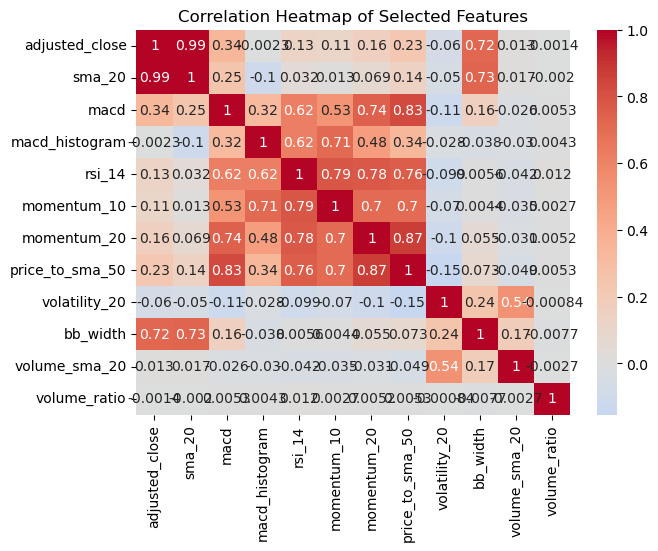

In [ ]:
# Confirming which features are highly
confirmation_features = ['adjusted_close','sma_20', 'macd', 'macd_histogram', 'rsi_14',
 'momentum_10', 'momentum_20', 'price_to_sma_50',
 'volatility_20', 'bb_width',
 'volume_sma_20', 'volume_ratio'
                          ]


# Computing the correlation matrix
corr = stock_P_indicators[confirmation_features].corr()

# Ploting the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

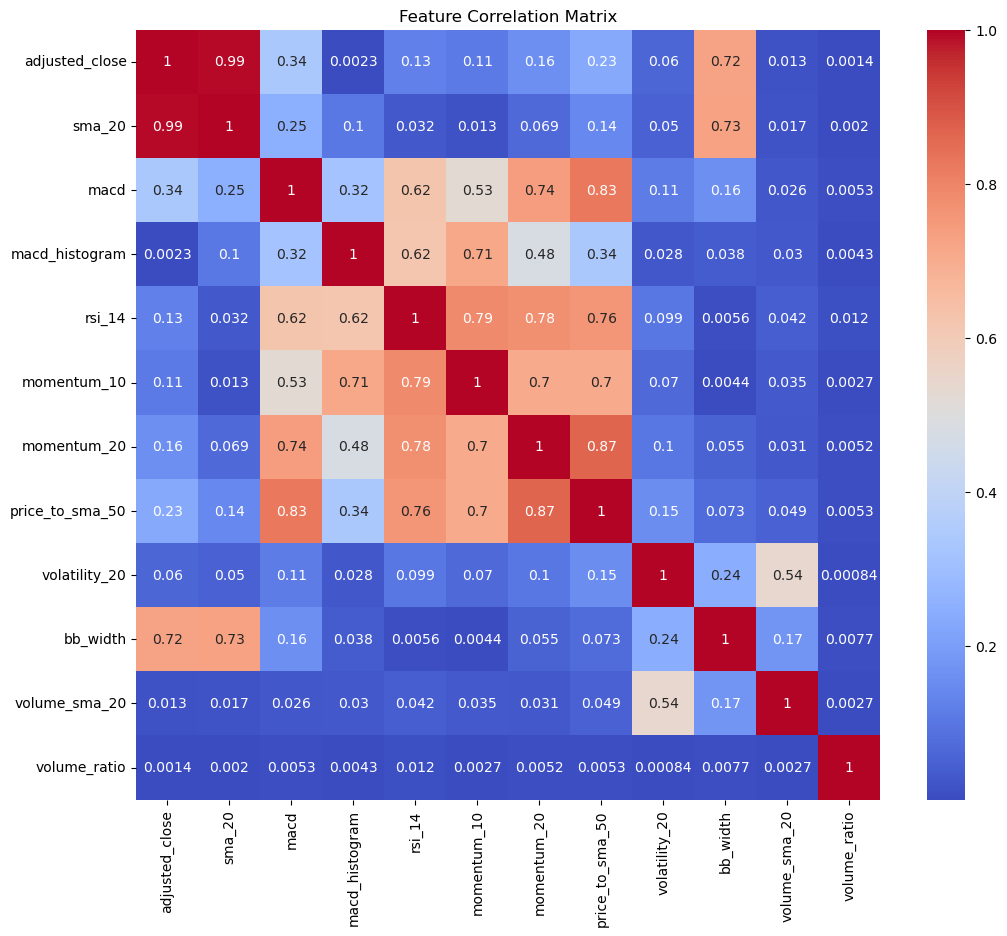

Highly correlated features to consider dropping: ['sma_20']


In [ ]:

# Selected features for analysis
features = ['adjusted_close','sma_20', 'macd', 'macd_histogram', 'rsi_14',
 'momentum_10', 'momentum_20', 'price_to_sma_50',
 'volatility_20', 'bb_width',
 'volume_sma_20', 'volume_ratio'
                          ]

# Compute correlation matrix
corr_matrix = stock_P_indicators[features].corr().abs()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
print("Highly correlated features to consider dropping:", to_drop)


In [ ]:
stock_P_indicators.head(2)

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110,160.110,...,2.88,2.880,962644.0,1.000000,-0.008557,-0.045594,0.000000,0.012463,0.026357,Uptrend
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235,161.235,...,5.39,4.135,1137664.5,1.153842,-0.008557,-0.045594,0.006977,0.012463,0.018169,Sideways


In [ ]:
stock_P_indicators['trend_label'].dtype

dtype('O')

In [ ]:
            # Selecting the recommended features from stock price indicators data set
# Price momentum: momentum_10, momentum_20
# Moving averages: sma_20, sma_50, price_to_sma_50
# Momentum indicators: rsi_14, macd, macd_signal
# Volatility: atr_14, volatility_20, bb_width
# Volume: volume_ratio, obv
# Position: bb_position, stochastic_k

# Defining the selected features
recommended_feature_set = ['adjusted_close','sma_20', 'macd', 'macd_histogram', 'rsi_14',
 'momentum_10', 'momentum_20', 'price_to_sma_50',
 'volatility_20', 'bb_width',
 'volume_sma_20', 'volume_ratio'
                          ]

# Defining target variable
target_variable = 'trend_label'

#  Keeping only relevant columns
model_df = stock_P_indicators[['ticker', 'date'] + recommended_feature_set + [target_variable]].copy()

# Removing rows with missing target variable
model_df = model_df.dropna(subset=[target_variable])

# Creating empty containers to hold training and testing data sets
train_data = []
test_data = []

# Going through each stock one by one
for ticker, stock_data in model_df.groupby('ticker'):
    # Counting how many rows this stock has
    total_rows = len(stock_data)
    
    # Finding where to split (70% for training)
    split_point = int(total_rows * 0.7)
    
    # First 70% of rows (earlier dates) should be training set
    train_part = stock_data.iloc[:split_point]   # i.e using the split function to specify which part of the data [:split_point]
    
    # Last 30% of rows (later dates) should test set
    test_part = stock_data.iloc[split_point:]  # i.e using the split function to specify which part of the data [split_point:]
    
    # Adding them to our lists
    train_data.append(train_part)
    test_data.append(test_part)

# Combining all stocks’ train and test data into single datasets
train_df = pd.concat(train_data)
test_df = pd.concat(test_data)





#### Model Development and Evaluation

In [ ]:
test_df.head(2)

,ticker,date,adjusted_close,sma_20,macd,macd_histogram,rsi_14,momentum_10,momentum_20,price_to_sma_50,volatility_20,bb_width,volume_sma_20,volume_ratio,trend_label
542,STK001,2023-02-01,267.67,263.575,8.307782,-1.805834,58.515535,-0.012106,0.070423,0.140853,0.016882,18.857044,1227929.65,1.003962,Uptrend
543,STK001,2023-02-02,273.48,264.569,8.412033,-1.361267,60.572366,0.035007,0.078391,0.156306,0.017213,18.378674,1243712.45,0.956837,Uptrend


In [ ]:
# Separating into features and target variable(trend_label)

# Features (all columns except target) and the ticker, since it's just the unique identifier
X_train = train_df.drop(['trend_label', 'ticker'], axis=1)
X_test = test_df.drop(['trend_label', 'ticker'], axis=1)

# Target variable
y_train = train_df['trend_label']
y_test = test_df['trend_label']


In [ ]:
# Encoding the target variable

from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

# Fit on training target
y_train = LabelEncoder.fit_transform(y_train)

# Transform test target using the same encoder
y_test = LabelEncoder.transform(y_test)





In [ ]:
# Verifying the data types
print(X_train.shape, X_test.shape)
print(y_train[:5], y_test[:5])


(10842, 13) (4660, 13)
[2 1 1 0 0] [2 2 2 2 2]


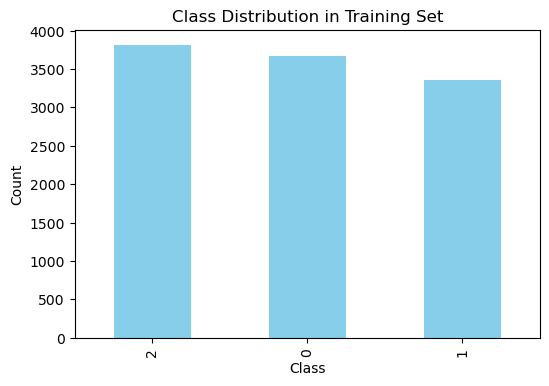

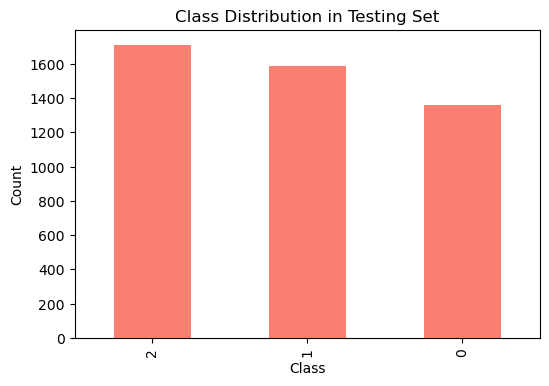

=== Training Set Counts ===
2    3818
0    3668
1    3356
Name: count, dtype: int64

=== Testing Set Counts ===
2    1714
1    1588
0    1358
Name: count, dtype: int64


In [ ]:
# Checking the class distribution of the target variable

import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train and y_test to Series (if not already)
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Training set distribution
plt.figure(figsize=(6,4))
y_train_series.value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Testing set distribution
plt.figure(figsize=(6,4))
y_test_series.value_counts().plot(kind='bar', color='salmon')
plt.title("Class Distribution in Testing Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



# Count rows in each category
counts_train = y_train_series.value_counts()
counts_test = y_test_series.value_counts()

# Display with headings
print("=== Training Set Counts ===")
print(counts_train)

print("\n=== Testing Set Counts ===")
print(counts_test)


In [ ]:
# Extracting date-based features 

# Ensure date column is in datetime format
X_train['date'] = pd.to_datetime(X_train['date'])
X_test['date'] = pd.to_datetime(X_test['date'])

# Extract meaningful features
for df in [X_train, X_test]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
    df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
    
# Drop original date column
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)


IndexError: index 9 is out of bounds for axis 0 with size 9

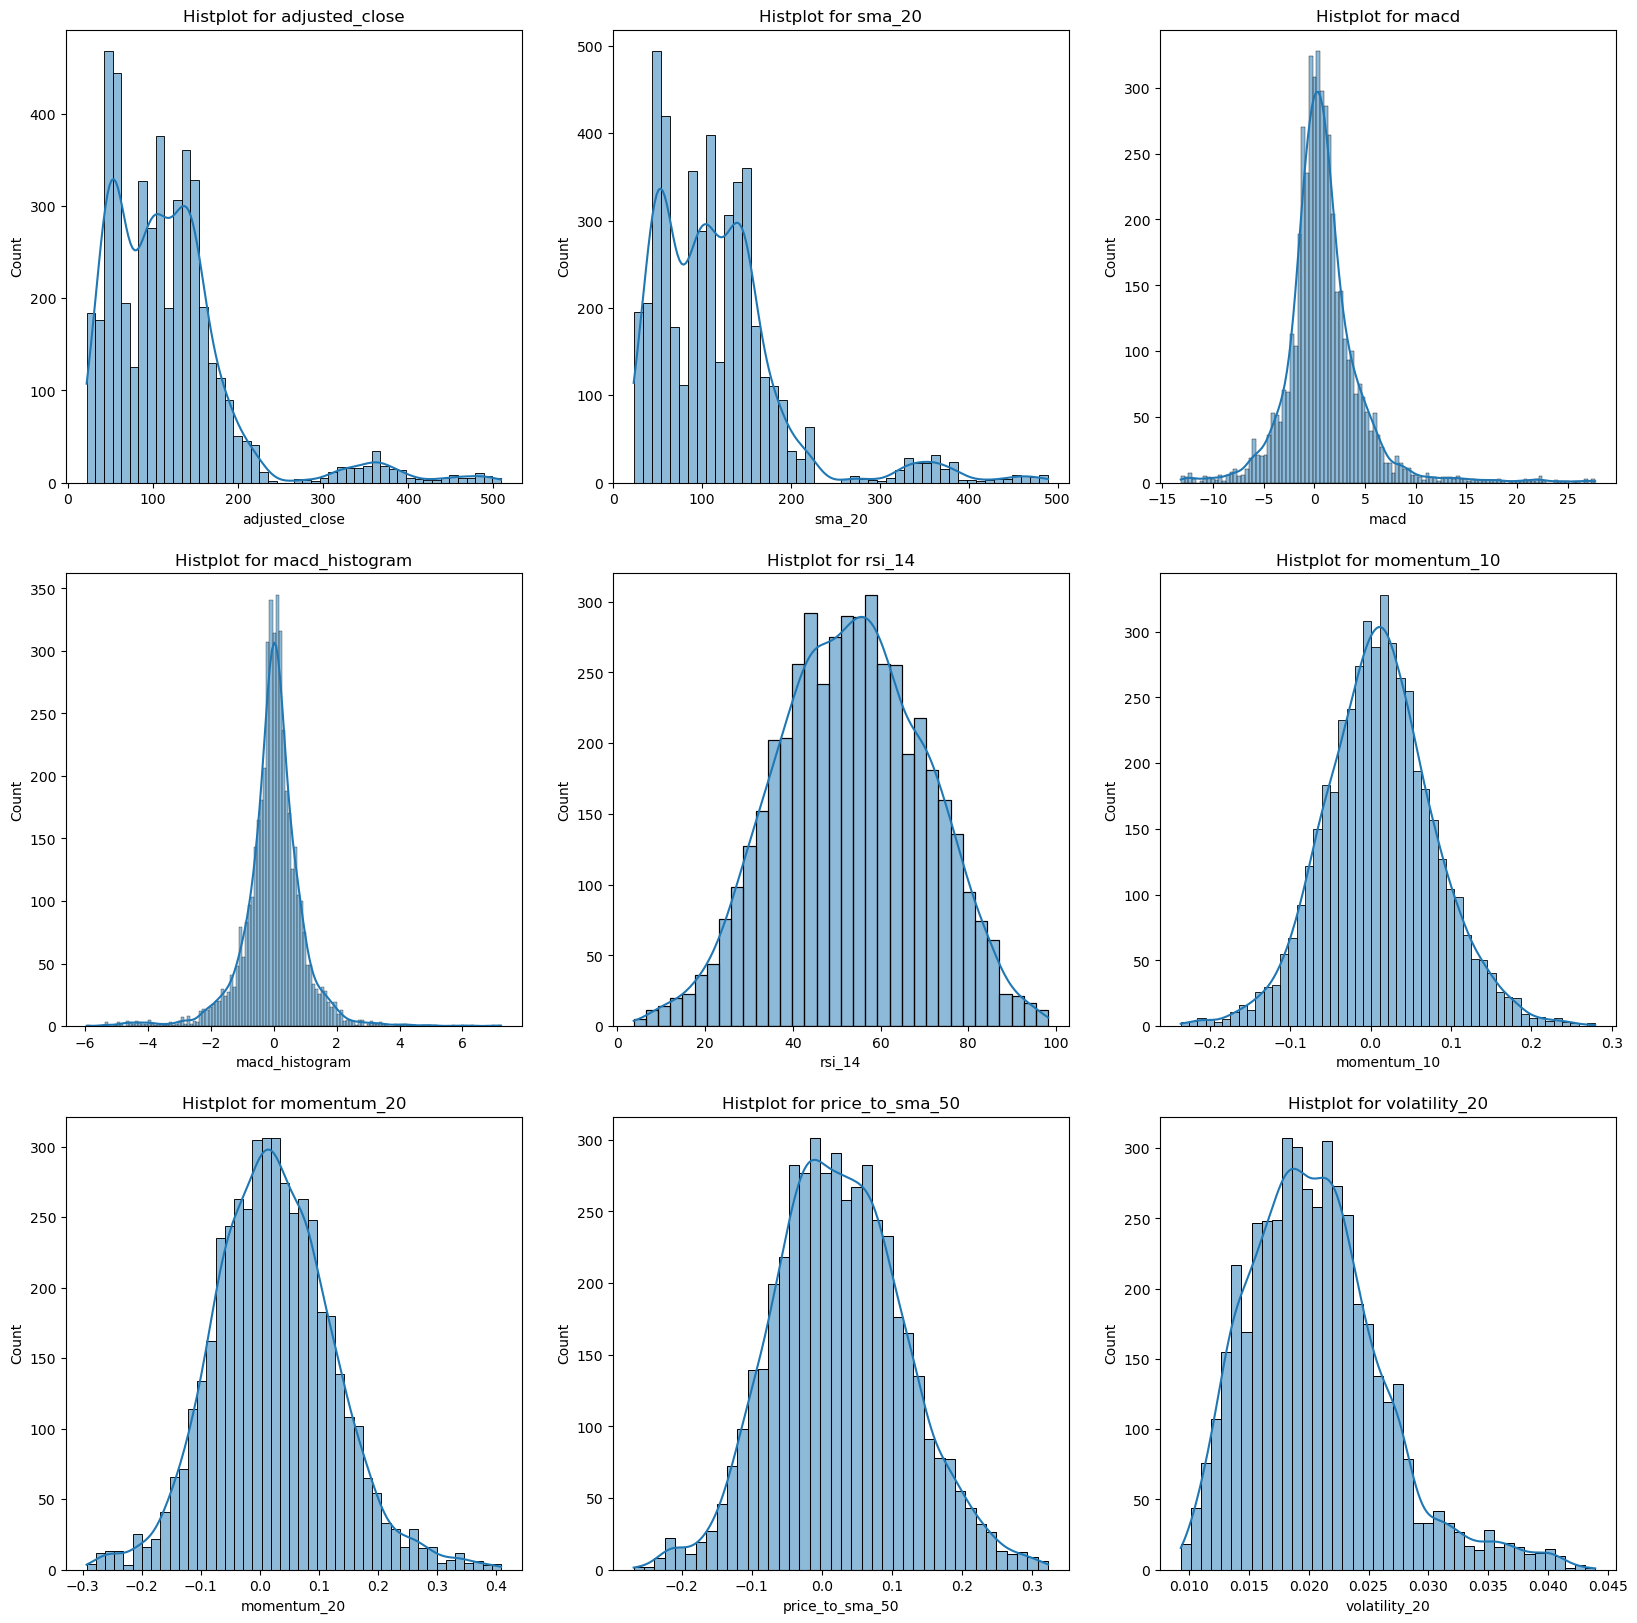

In [ ]:
# Confirming the data distribution (x_train) and which sclaler would be appropriate
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
ax=ax.flatten()

for idx, col in enumerate(X_train):
    sns.histplot(df[col], ax=ax[idx], kde=True )
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

##### Insight: Features selected appear to be normal hence a standard scaler would work perfectly.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing the scaler
scaler = StandardScaler()

# Fitting on training data and transforming
X_train_scaled = scaler.fit_transform(X_train)

# Transforming test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Optional: converting back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Check first few rows
print(X_train_scaled.head())


   adjusted_close    sma_20      macd  macd_histogram    rsi_14  momentum_10  \
0        1.358345  1.382256 -0.022914       -0.009473  2.970270    -0.143496   
1        1.405954  1.406429  0.032356        0.145031  2.970270    -0.143496   
2        1.393681  1.410332  0.060782        0.193592  1.743997    -0.143496   
3        1.505614  1.440701  0.212047        0.575825  2.542886    -0.143496   
4        1.476203  1.452948  0.293736        0.687121  1.730813    -0.143496   

   momentum_20  price_to_sma_50  volatility_20  bb_width  volume_sma_20  \
0    -0.443603        -0.001576      -1.571940 -0.732354      -4.944228   
1    -0.443603         0.070342      -1.571940 -0.732354      -1.956513   
2    -0.443603         0.021625      -1.571940 -0.861321      -0.183938   
3    -0.443603         0.266818      -0.797849 -0.307685       1.067900   
4    -0.443603         0.142246      -0.726282 -0.338917      -0.525044   

   volume_ratio      year     month       day  day_of_week  is_weeke

In [ ]:
# Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing the Model - Multiclass logistic regression (since there are more two classes of the target variable)
model = LogisticRegression(max_iter=1000, multi_class='auto', class_weight='balanced')


In [ ]:
# Fitting the model on the train data
model.fit(X_train_scaled, y_train)


C:\Users\TRIPLE D.TECH\Anaconda\envs\Supervised_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'auto'


In [ ]:
# Generating predictions on the test data
y_pred = model.predict(X_test_scaled)


##### Evaluating the model

Logistic Regression Model's classification report
              precision    recall  f1-score   support

           0       0.43      0.01      0.02      1358
           1       0.39      0.16      0.23      1588
           2       0.37      0.85      0.51      1714

    accuracy                           0.37      4660
   macro avg       0.40      0.34      0.25      4660
weighted avg       0.40      0.37      0.27      4660



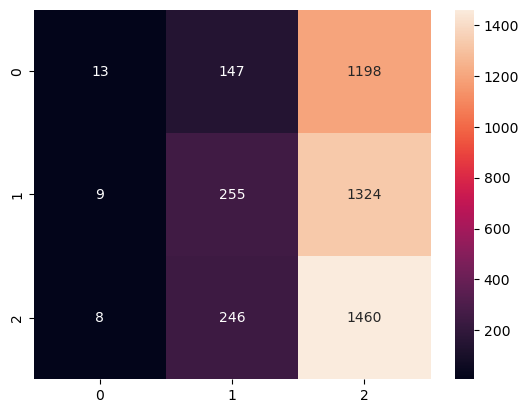

In [ ]:
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Model's classification report")
print(report)

sns.heatmap(matrix, annot=True, fmt="g")
plt.show()


#### Building more sophisticated models 

### 1. Random Forest Model

Random Forest Model's classification report
              precision    recall  f1-score   support

           0       0.30      0.28      0.29      1358
           1       0.38      0.29      0.33      1588
           2       0.37      0.46      0.41      1714

    accuracy                           0.35      4660
   macro avg       0.35      0.35      0.34      4660
weighted avg       0.35      0.35      0.35      4660

Accuracy on test set: 0.35


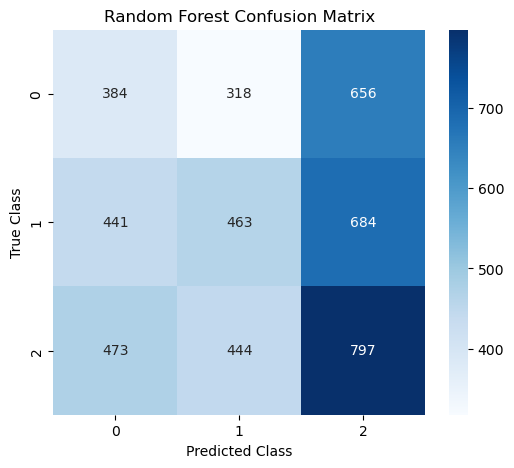

In [ ]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initializing Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    class_weight='balanced'  # optional, helps with class imbalance
)

# Fitting model on training data
rf_model.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model's classification report")
print(report_rf)

print(f"Accuracy on test set: {accuracy_rf:.2f}")

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(matrix_rf, annot=True, fmt="g", cmap='Blues')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Random Forest Confusion Matrix")
plt.show()


#### Hyperparameter Tuning:

Best hyperparameters found:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Model Accuracy after tuning: 0.36

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.18      0.23      1358
           1       0.38      0.40      0.39      1588
           2       0.37      0.47      0.42      1714

    accuracy                           0.36      4660
   macro avg       0.35      0.35      0.34      4660
weighted avg       0.35      0.36      0.35      4660



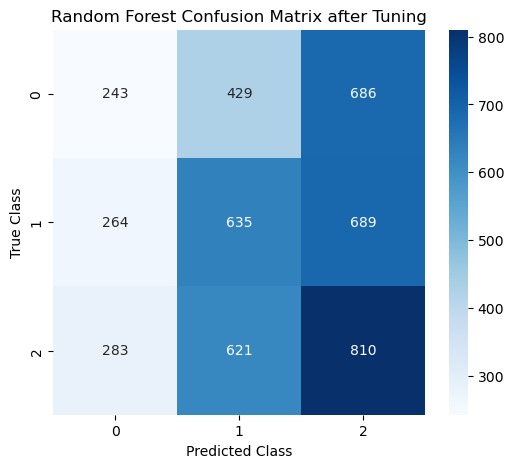

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initializing GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,                    # 3-fold cross-validation
    scoring='accuracy',       # optimize for accuracy
    n_jobs=-1                 # use all CPU cores
)

# Fitting on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Predicting on test data using best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"\nRandom Forest Model Accuracy after tuning: {accuracy_rf:.2f}")
print("\nClassification Report:\n", report_rf)

plt.figure(figsize=(6,5))
sns.heatmap(matrix_rf, annot=True, fmt="g", cmap='Blues')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Random Forest Confusion Matrix after Tuning")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

%pip install xgboost
from xgboost import XGBClassifier

Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.00      0.01      1358
           1       0.38      0.05      0.08      1588
           2       0.37      0.95      0.53      1714

    accuracy                           0.37      4660
   macro avg       0.32      0.33      0.21      4660
weighted avg       0.33      0.37      0.23      4660



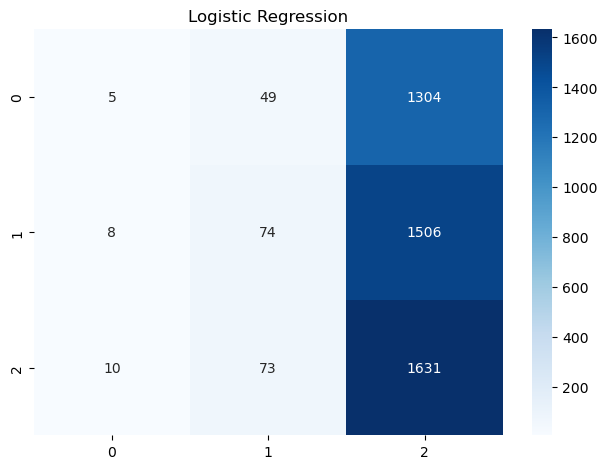

Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.32      0.31      1358
           1       0.35      0.27      0.31      1588
           2       0.37      0.41      0.39      1714

    accuracy                           0.34      4660
   macro avg       0.34      0.34      0.33      4660
weighted avg       0.34      0.34      0.34      4660



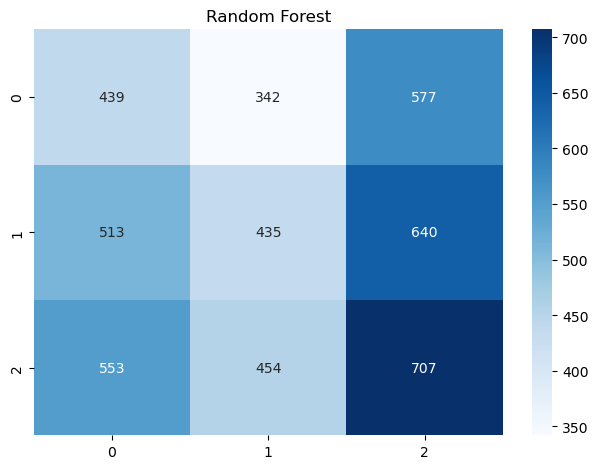

Training Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.37      0.35      1358
           1       0.39      0.27      0.32      1588
           2       0.38      0.46      0.42      1714

    accuracy                           0.37      4660
   macro avg       0.37      0.37      0.36      4660
weighted avg       0.37      0.37      0.37      4660



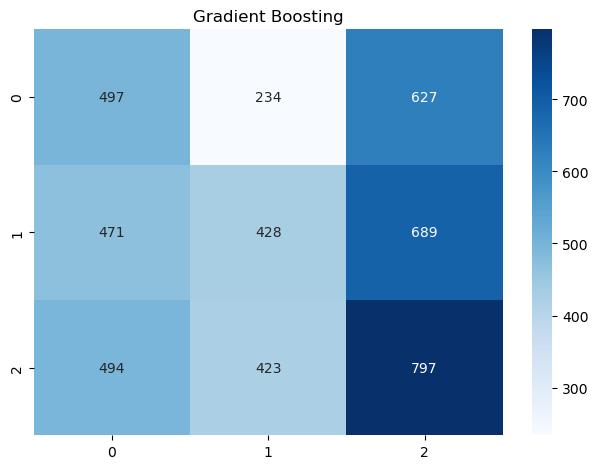

Training AdaBoost...
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.18      0.23      1358
           1       0.38      0.26      0.31      1588
           2       0.35      0.58      0.44      1714

    accuracy                           0.35      4660
   macro avg       0.35      0.34      0.33      4660
weighted avg       0.35      0.35      0.34      4660



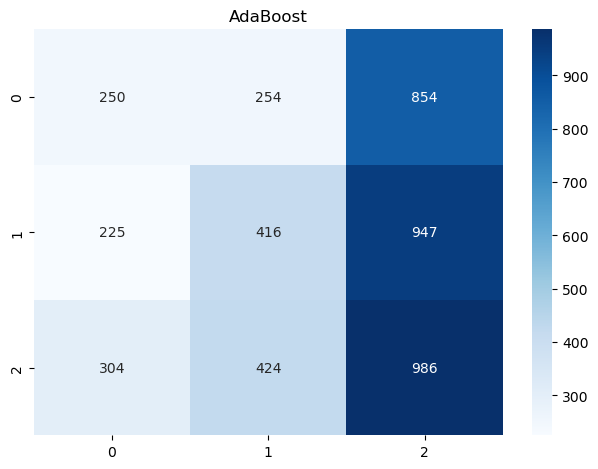

Training SVC...
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.15      0.21      1358
           1       0.37      0.32      0.34      1588
           2       0.37      0.58      0.45      1714

    accuracy                           0.37      4660
   macro avg       0.36      0.35      0.34      4660
weighted avg       0.36      0.37      0.34      4660



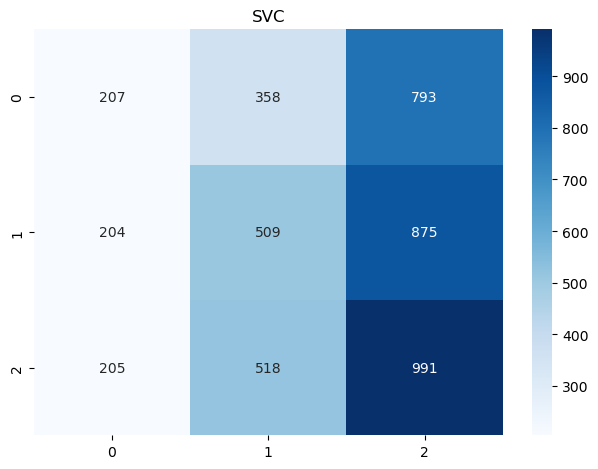

Training KNeighborsClassifier...
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.41      0.35      1358
           1       0.36      0.38      0.37      1588
           2       0.36      0.25      0.30      1714

    accuracy                           0.34      4660
   macro avg       0.34      0.35      0.34      4660
weighted avg       0.35      0.34      0.34      4660



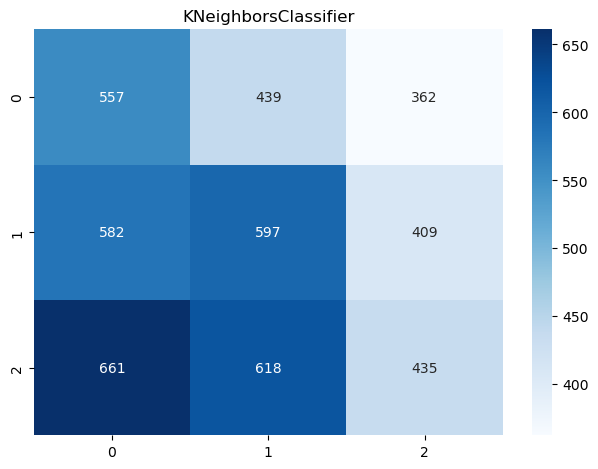

Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.34      0.33      1358
           1       0.34      0.36      0.35      1588
           2       0.34      0.30      0.32      1714

    accuracy                           0.33      4660
   macro avg       0.33      0.33      0.33      4660
weighted avg       0.33      0.33      0.33      4660



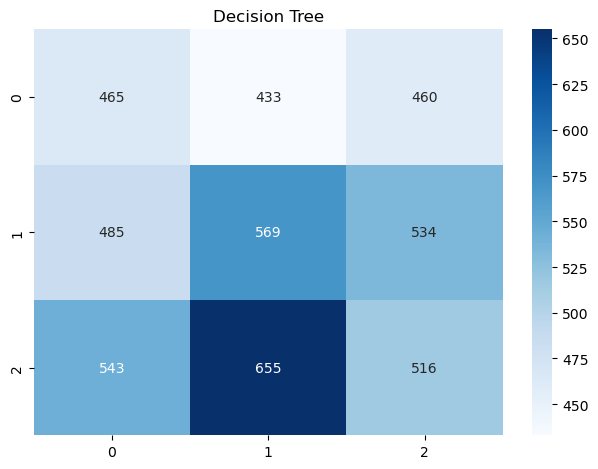

Training XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.38      0.35      1358
           1       0.39      0.31      0.35      1588
           2       0.39      0.42      0.41      1714

    accuracy                           0.37      4660
   macro avg       0.37      0.37      0.37      4660
weighted avg       0.37      0.37      0.37      4660



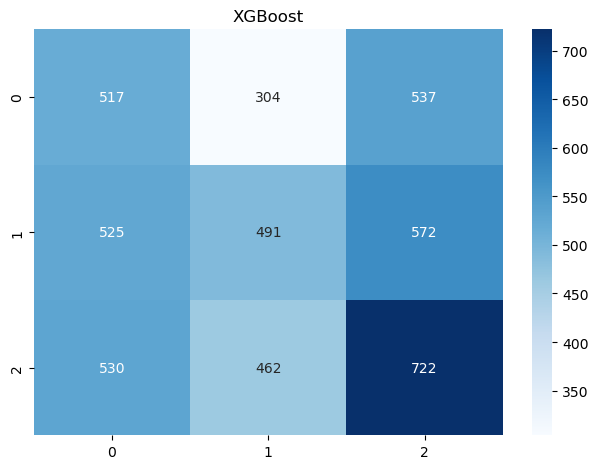

In [ ]:
# Getting the visualizations and reports
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVC': SVC(class_weight='balanced', probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }
    
    print(f"{model_name} Classification Report:")
    print(report)
    sns.heatmap(matrix, annot=True, fmt="g", cmap="Blues")
    plt.title(f"{model_name}")
    plt.tight_layout()
    plt.show()

In [ ]:
importances = rf_model.feature_importances_  

features = X_train_scaled.columns

feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10,6))

sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="cubehelix")
plt.title("Permutation Importance")

plt.tight_layout()
plt.show();